<a href="https://colab.research.google.com/github/MohamedRadwan2000/Face-Recognition/blob/main/Radwan_3rd_copy_of_Face_Vs_nun_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face-Recognition

##Installation and handling data

In this section we will import the required dependencies and import the data and split it as required.We will show some classes (subjects) of the data. By the end of this section the data would be ready for the next section.

In [ ]:
%%capture
%matplotlib inline
# Clonning the data
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets download -d kasikrit/att-database-of-faces
! unzip /content/att-database-of-faces.zip ;
! rm /content/att-database-of-faces.zip

# Importing libraries
import numpy as np
import PIL
from PIL import Image
from numpy import asarray
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# Creating the Data matrix and the labels
list_of_vectors = list()
for subject in range(1,41):
  vectors = list()
  for image in range(1,11):
    an_image = PIL.Image.open(f'/content/s{subject}/{image}.pgm')
    image_sequence = an_image.getdata()
    image_array = np.array(image_sequence).reshape((-1,1))
    vectors.append(image_array)
  list_of_vectors.append(vectors)
D = np.stack(list_of_vectors,axis = 0).reshape((400,-1))
Y = np.array([x for x in range(1,41) for j in range(10)]).reshape(-1,1)
print(D.shape)
print(Y.shape)
print(D)

(400, 10304)
(400, 1)
[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets download -d olavomendes/cars-vs-flowers
! unzip /content/cars-vs-flowers.zip
! rm /content/cars-vs-flowers.zip
% cd /content/dataset/cars_vs_flowers/training_set/car
lines = !ls
% cd

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 68% 13.0M/19.1M [00:00<00:00, 131MB/s]
100% 19.1M/19.1M [00:00<00:00, 155MB/s]
Archive:  /content/cars-vs-flowers.zip
replace car_test_image.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: car_test_image.jpg      
  inflating: dataset/cars_vs_flowers/test_set/car/fce7091377619593.jpg  
  inflating: dataset/cars_vs_flowers/test_set/car/fcea2e889e0b8522.jpg  
  inflating: dataset/cars_vs_flowers/test_set/car/fcea43d1dd20d681.jpg  
  inflating: dataset/cars_vs_flowers/test_set/car/fceb63b6882e9f19.jpg  
  inflating: dataset/cars_vs_flowers/test_set/car/fceb6d51c853ddd3.jpg  
  inflating: dataset/cars_vs_flowers/test_set/car/fceb8cd7e9456691.jpg  
  inflating: dataset/cars_vs_flowers/test_set/car/fced9a4e582878a3.jpg  
  inflating: dataset/cars_vs_flowers/test_set/car/fcedc4bcd9d0c333.jpg  
  inflating: dataset/cars_vs_flowers/test_set/car/fcee5f7e54646cf6.jpg  
  inflating: dataset/cars_vs_flowers/test_set/car/fcef1c17

In [ ]:
% cd /content/dataset/cars_vs_flowers/training_set/car
lines = !ls
% cd /content

/content/dataset/cars_vs_flowers/training_set/car
/content


In [ ]:
photos_names = list()
for line in lines:
  for photo in line.split():
    photos_names.append(photo)

# Creating the Data matrix and the labels
vectors = list()
for name in photos_names:
  an_image = PIL.Image.open(f'/content/dataset/cars_vs_flowers/training_set/car/{name}').convert('L').resize((92,112))
  image_sequence = an_image.getdata()
  image_array = np.array(image_sequence).reshape((-1,1))
  vectors.append(image_array)
cars = np.array(vectors).squeeze()

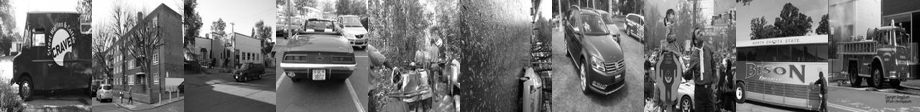

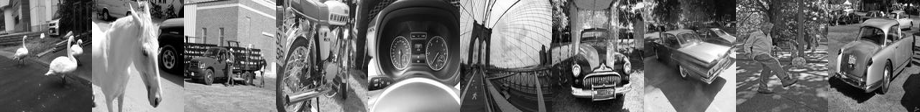

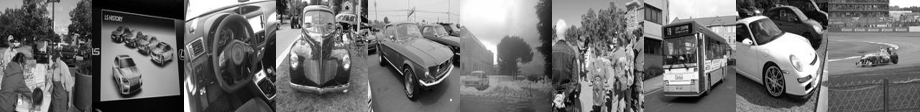

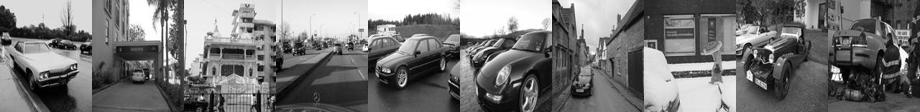

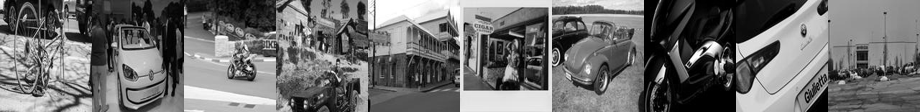

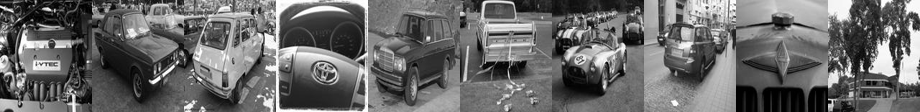

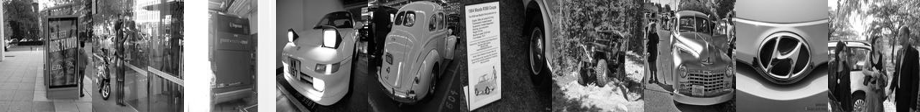

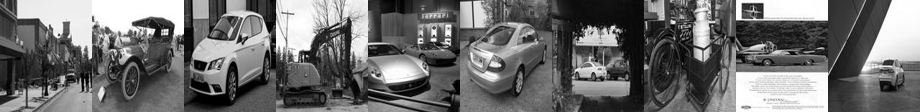

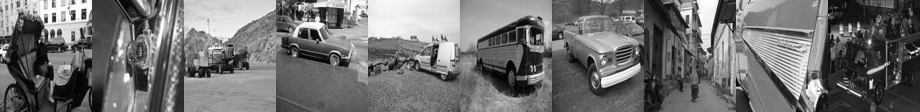

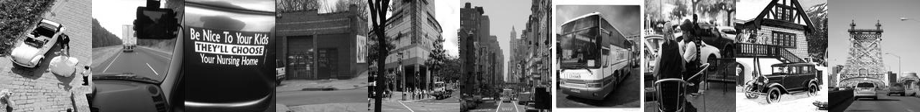

In [ ]:
for i in range(10):
    img = PIL.Image.fromarray(np.concatenate((
        cars[i*10].reshape(-1,92),cars[i*10+1].reshape(-1,92),cars[i*100+2].reshape(-1,92),cars[i*10+3].reshape(-1,92),
        cars[i*10+4].reshape(-1,92),cars[i*10+5].reshape(-1,92),cars[i*10+6].reshape(-1,92),cars[i*10+7].reshape(-1,92),
        cars[i*10+8].reshape(-1,92),cars[i*10+9].reshape(-1,92)
        ),axis = 1).reshape(112,-1).astype('uint8'))
    display(img)

In [ ]:
cars.shape

(1000, 10304)

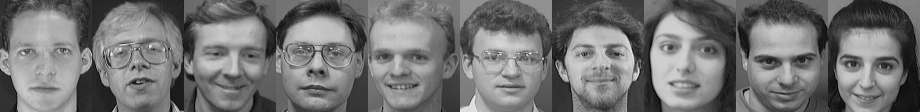

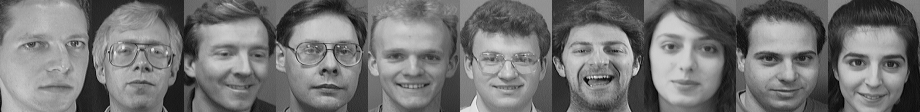

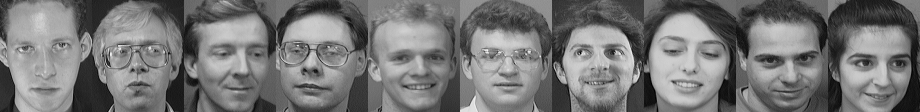

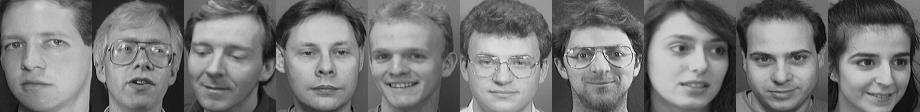

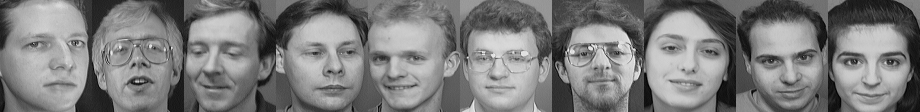

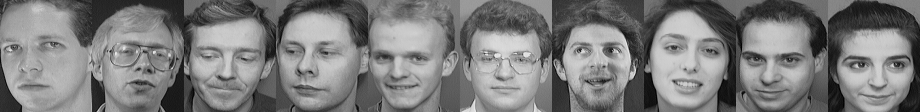

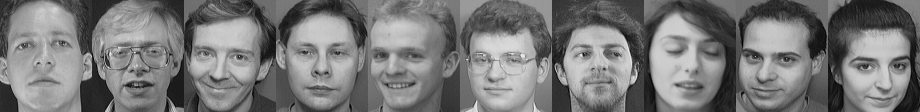

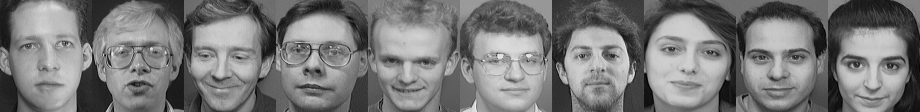

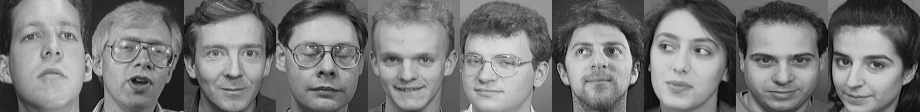

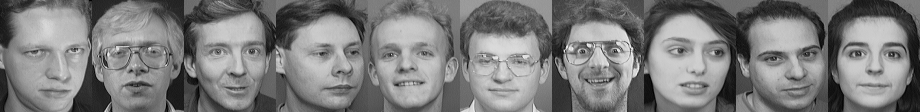

In [ ]:
# Displaying some of the subjects
for i in range(10):
    img = PIL.Image.fromarray(np.concatenate((
        D[i].reshape(-1,92),D[i+10].reshape(-1,92),D[i+20].reshape(-1,92),D[i+30].reshape(-1,92),
        D[i+40].reshape(-1,92),D[i+50].reshape(-1,92),D[i+60].reshape(-1,92),D[i+70].reshape(-1,92),
        D[i+80].reshape(-1,92),D[i+90].reshape(-1,92)
        ),axis = 1).reshape(112,-1).astype('uint8'))
    display(img)

In [ ]:
Y_face = np.array([[1]]*400) 
Y_nonface = np.array([[0]]*1000)
Y_new = np.concatenate([Y_face,Y_nonface])

D_new = np.concatenate([D,cars])

D = D_new[0:950]
Y = Y_new[0:950]

In [ ]:
# Splitting data
training_data = list()
training_labels = list()
test_data = list()
test_labels = list()
for i in range(len(D)):
  if i%2 == 1:
    training_data.append(D[i])
    training_labels.append(Y[i])
  else :
    test_data.append(D[i])
    test_labels.append(Y[i])
D_train = np.array(training_data)
Y_train = np.array(training_labels)
D_test = np.array(test_data)
Y_test = np.array(test_labels)
print(f'Training data shape : {D_train.shape} || Training data labels shape : {Y_train.shape}')
print(f'Test data shape : {D_test.shape} || Test data labels shape : {Y_test.shape}')

Training data shape : (475, 10304) || Training data labels shape : (475, 1)
Test data shape : (475, 10304) || Test data labels shape : (475, 1)


## PCA

In [ ]:
# This function returns the eigen values and eigen vectors after centralizing the data and sorting them descendingly
def get_eigen(D):
  mean_vector = np.mean(D_train,axis = 0).reshape((-1,1)).T
  Z = D_train-mean_vector
  cov = (1/Z.shape[0])*np.dot(Z.T,Z)
  eigen_values ,eigen_vectors = np.linalg.eigh(cov)
  idx = eigen_values.argsort()[::-1] # returns the indeces soreted in desending order
  eigen_values = eigen_values[idx]
  eigen_vectors = eigen_vectors[:,idx]
  eigen_vectors = np.real(eigen_vectors)
  return eigen_values,eigen_vectors

In [ ]:
# This function returns the projection matrix using the eigen values and vectors from the previous function and for some alpha
def get_projection(eigen_values,eigen_vectors,alpha):
  total_sum = np.sum(eigen_values)
  current_sum = 0
  r = -1
  while(current_sum/total_sum < alpha):
    r+=1
    current_sum+=eigen_values[r]
  if (r+1)==eigen_vectors.shape[0]:
    r-=1
  return eigen_vectors[:,:(r+1)]

In [ ]:
# Getting eigen_values and vectors
eigen_values,eigen_vectors = get_eigen(D_train)

In [ ]:
# Getting projection matrices for all alpha
alpha=[0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975]
projection_matrices = list()
for a in alpha:
  projection_matrices.append(get_projection(eigen_values,eigen_vectors,a))

In [ ]:
#projection of training and test data
projected_training_data=[]
projected_test_data=[]
for i in projection_matrices:
  projected_training_data.append(D_train.dot(i))
  projected_test_data.append(D_test.dot(i))
print("Trainig data")
for i in projected_training_data:
  print(i.shape)
print("Test data")

Trainig data
(475, 26)
(475, 32)
(475, 38)
(475, 47)
(475, 58)
(475, 71)
(475, 87)
(475, 108)
(475, 135)
(475, 169)
(475, 216)
(475, 288)
Test data


In [ ]:
#transform data from numpy.array to dataframe
df_train_labels=pd.DataFrame(Y_train,columns=["class"])
df_test_labels=pd.DataFrame(Y_test,columns=["class"])
df_train=[]
df_test=[]
columns_vectors=[]

for i in projected_training_data:
   columns_vectors.append((["PC"+str(x+1) for x in range(len(i[0]))]))
print(columns_vectors)
for i in range(len(projected_training_data)):
    df_test.append(pd.DataFrame(projected_test_data[i], columns =columns_vectors[i]))
    df_train.append(pd.DataFrame(projected_training_data[i], columns =columns_vectors[i]))
    

[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26'], ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32'], ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38'], ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC3

In [ ]:
# classify data using (first Nearest Neighbor to determine the class labels)
all_accuracies=[]
labels_pred_PCA=[]
enterFlag=False
for k in  (1,3,5,7):
      accuracies=[]
      print("For "+str(k)+" n_neighbors")
      for test,train,a in zip(df_test,df_train,alpha):
          # make our model
          knn= KNeighborsClassifier(n_neighbors=k);
          # Train the model
          knn.fit(train, df_train_labels.values.ravel());
          # predict the labels 
         
          
          labels_pred = knn.predict(test)
          if not enterFlag:
             labels_pred_PCA=labels_pred
             enterFlag=True
          accuracies.append(metrics.accuracy_score(df_test_labels,labels_pred))
          print("Accuracy with alpha("+str(a)+") = ",metrics.accuracy_score(df_test_labels,labels_pred))
          #print("classification report:")
          #print(metrics.classification_report(df_test_labels, labels_pred))
      all_accuracies.append(accuracies)
      print("--------------------------------------------------------\n")

For 1 n_neighbors
Accuracy with alpha(0.7) =  0.9326315789473684
Accuracy with alpha(0.725) =  0.9263157894736842
Accuracy with alpha(0.75) =  0.9157894736842105
Accuracy with alpha(0.775) =  0.9010526315789473
Accuracy with alpha(0.8) =  0.8947368421052632
Accuracy with alpha(0.825) =  0.888421052631579
Accuracy with alpha(0.85) =  0.88
Accuracy with alpha(0.875) =  0.871578947368421
Accuracy with alpha(0.9) =  0.8589473684210527
Accuracy with alpha(0.925) =  0.8568421052631578
Accuracy with alpha(0.95) =  0.848421052631579
Accuracy with alpha(0.975) =  0.8336842105263158
--------------------------------------------------------

For 3 n_neighbors
Accuracy with alpha(0.7) =  0.9031578947368422
Accuracy with alpha(0.725) =  0.8905263157894737
Accuracy with alpha(0.75) =  0.888421052631579
Accuracy with alpha(0.775) =  0.8736842105263158
Accuracy with alpha(0.8) =  0.8610526315789474
Accuracy with alpha(0.825) =  0.8673684210526316
Accuracy with alpha(0.85) =  0.8631578947368421
Accuracy

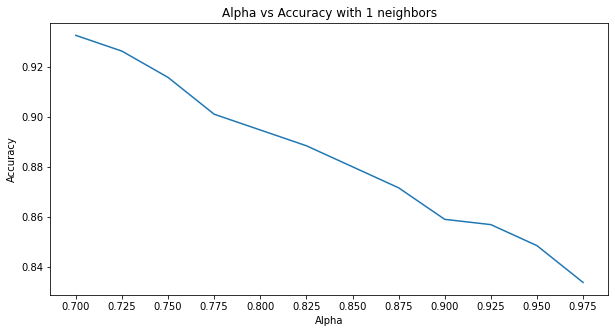

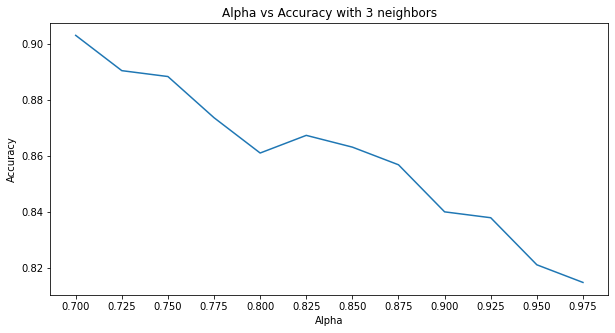

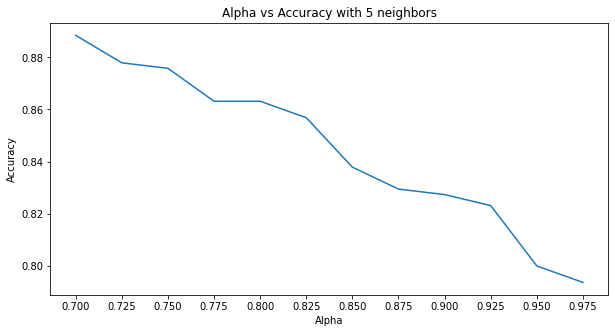

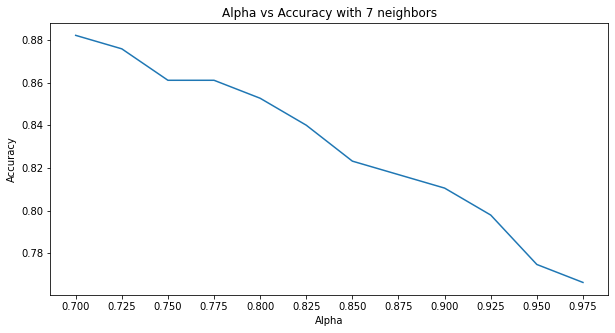

In [ ]:
for accuracies,k in zip(all_accuracies,(1,3,5,7)):
    plt.figure(figsize=(10,5));
    plt.plot(alpha,accuracies);
    plt.title("Alpha vs Accuracy with "+str(k)+" neighbors")
    plt.xlabel("Alpha")
    plt.ylabel("Accuracy");
    plt.xticks(alpha)
    plt.grid(False)

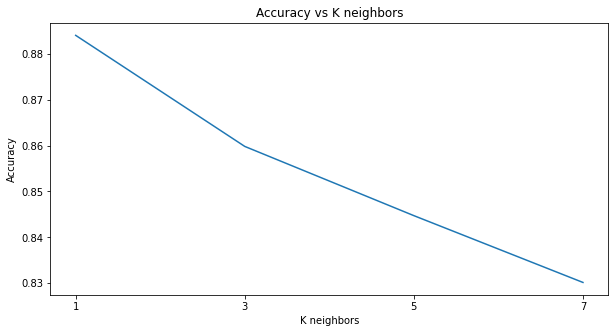

In [ ]:
#plot accuracy vs k_neighbors
mean=np.mean(all_accuracies,axis=1)
plt.figure(figsize=(10,5));
k=[1,3,5,7]
plt.plot(k,mean);
plt.title("Accuracy vs K neighbors")
plt.xlabel("K neighbors")
plt.ylabel("Accuracy");
plt.xticks(k)
plt.grid(False)

get the images in the lower dimention (the eigen face using the choosen
 eigen vectors)

(10304, 40)


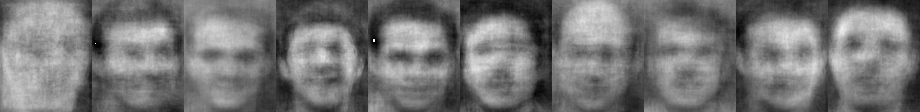

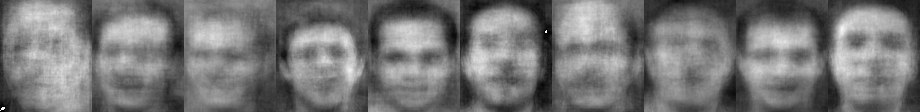

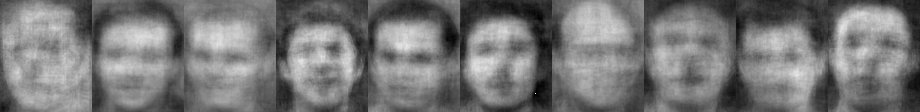

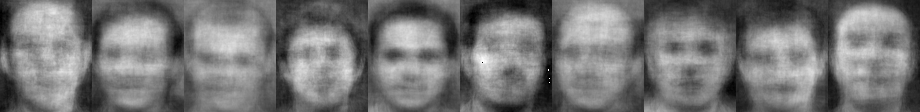

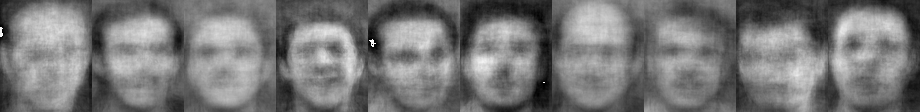

In [ ]:
mean_vector = np.mean(D_train,axis = 0).reshape((-1,1)).T
Z = D_train-mean_vector
p = projection_matrices[11][:,0:40]
eigen_vectors=projection_matrices[11][:,0:100]
print(p.shape)
A = np.dot(Z,p)
Z_new = np.dot(A,p.T)
Z_new=Z_new+mean_vector

##show_image(Z_new[0])
for i in range(5):
  img = PIL.Image.fromarray(np.concatenate((
      Z_new[i].reshape(-1,92),Z_new[i+10].reshape(-1,92),Z_new[i+20].reshape(-1,92),Z_new[i+30].reshape(-1,92),
      Z_new[i+40].reshape(-1,92),Z_new[i+50].reshape(-1,92),Z_new[i+60].reshape(-1,92),Z_new[i+70].reshape(-1,92),
      Z_new[i+80].reshape(-1,92),Z_new[i+90].reshape(-1,92)
      ),axis = 1).reshape(112,-1).astype('uint8'))
  display(img.convert("L"))

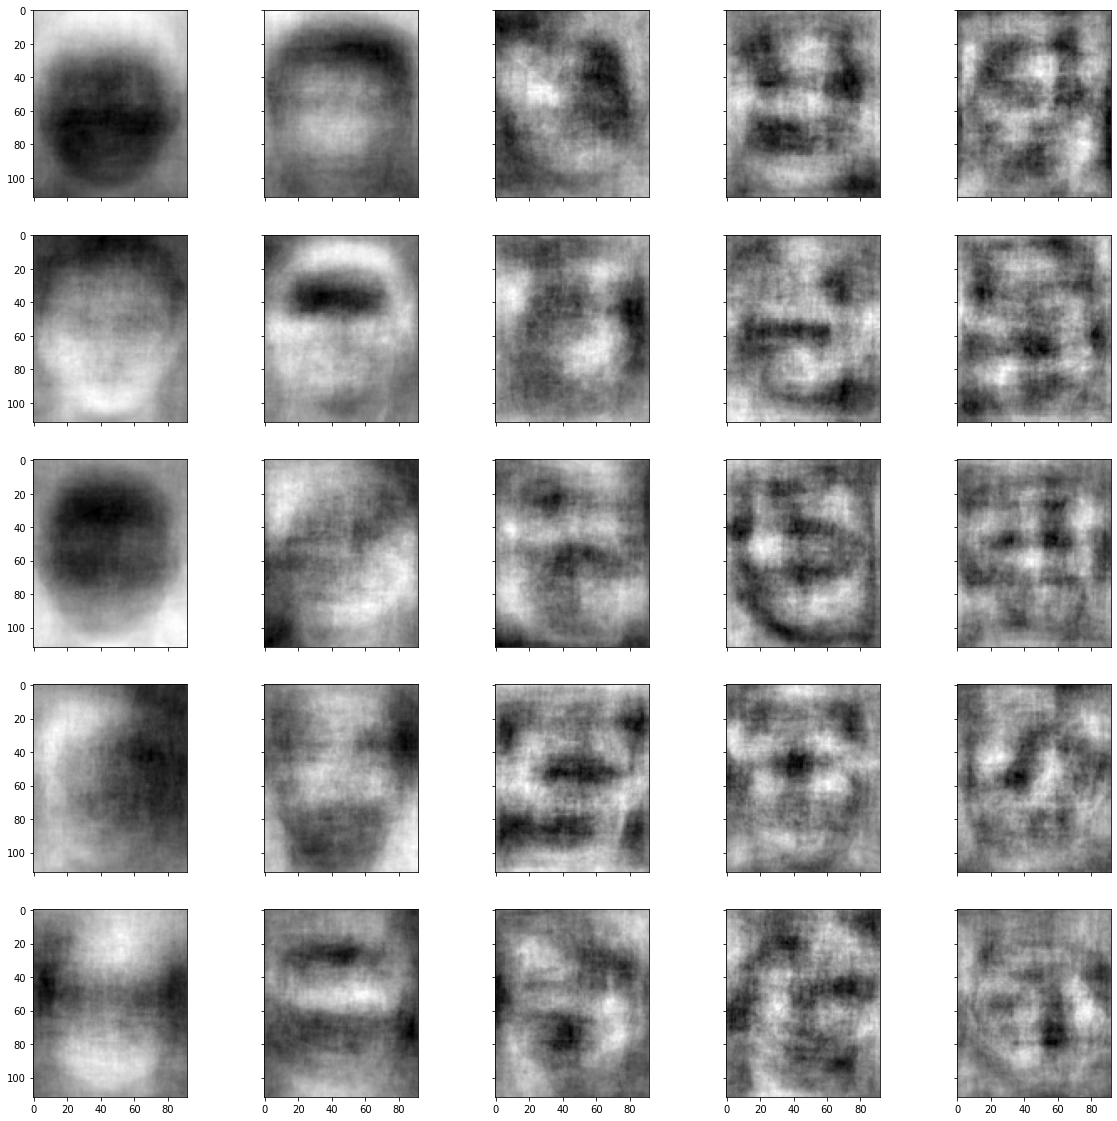

In [ ]:
# Show the first 16 eigenfaces
fig, axes = plt.subplots(5,5,sharex=True,sharey=True,figsize=(20,20))
for i in range(25):
    axes[i%5][i//5].imshow(eigen_vectors[:,i].reshape(112, 92), cmap="gray")
plt.show()

## LDA
 Classification Using LDA

In [ ]:
from numpy.linalg import eigh

def findClusterIndex(cluster,clusters_names):
  not_in_list = cluster not in clusters_names
  if not_in_list:
    clusters_names.append(cluster)
  index = clusters_names.index(cluster)
  return index

def findClusterArray(instance,clusters_names, clusters):
  index = findClusterIndex(instance,clusters_names)
  if index >= len(clusters):
    clusters.append(list())
  return clusters[index]

def appendToCluster(instance , instance_class,clusters_names, clusters):
  cluster = findClusterArray(instance_class,clusters_names, clusters)
  cluster.append(instance)

def show_image(image_vector):
  img = PIL.Image.fromarray(np.concatenate((
        image_vector.reshape(-1,92)
        ),axis = 0).reshape(112,-1).astype('uint8'))
  display(img)

def clac_mean(clusters):
  means = list()
  for cluster in clusters:
    means.append(cluster.mean(0))
  return means

def calc_Sb(clusters, means, num_of_sttributes, sample_mean):
  Sb = np.zeros((num_of_sttributes,num_of_sttributes)) 
  Sb = np.matrix(Sb)
  for i in range(len(means)):
    m_diff = (means[i] - sample_mean).reshape(num_of_sttributes,1)
    Sb += len(clusters[i])*np.dot( m_diff , np.transpose(m_diff))
  return Sb

def centralization(clusters, means):
  centralized_clusters = list()
  for i in range(len(clusters)):
    cluster = clusters[i]
    centralized_clusters.append(cluster-means[i])
  return centralized_clusters

## (5)
def calc_scatter_matrix(centralized_clusters, means, num_of_sttributes):
  scatter_matrix = np.zeros((num_of_sttributes,num_of_sttributes))
  scatter_matrix = np.matrix(scatter_matrix)
  for i in range(len(means)):
    Zi = np.matrix(centralized_clusters[i])
    x = (Zi.T)*Zi
    scatter_matrix += x
  return scatter_matrix

def LDA(D_train,Y_train):
  num_of_instances = len(D_train)
  num_of_sttributes = len(D_train[0])
  clusters_names = list()
  clusters = list()
  ## (1)
  for i in range(num_of_instances):
    appendToCluster(D_train[i],Y_train[i],clusters_names, clusters)

  clusters_number = len(clusters)
  for i in range(clusters_number):
    clusters[i] = np.array(clusters[i])
  clusters_names = np.array(clusters_names)
  ## (2)
  means = clac_mean(clusters)
  means = np.array(means)
  sample_mean = D_train.mean(0)
  ## (3)
  Sb = calc_Sb(clusters, means, num_of_sttributes, sample_mean)
  ## (4)
  centralized_clusters = centralization(clusters, means)
  Z = centralized_clusters
  ## (5),(6)
  scatter_matrix = calc_scatter_matrix(centralized_clusters, means, num_of_sttributes)
  print(scatter_matrix.shape)
  print(scatter_matrix)
  ## (7)
  SinvB = np.dot(np.linalg.inv(scatter_matrix),Sb)
  e_vals, e_vecs = eigh(SinvB)

  e_vals = np.real(e_vals)
  e_vals[e_vals < 0] = 0
  idx = e_vals.argsort()[::-1] # returns the indeces soreted in desending order
  e_vals = e_vals[idx]
  e_vecs = e_vecs[:,idx]
  e_vecs = np.real(e_vecs)
  return e_vecs[:,0 : clusters_number-1]

e_vecs = LDA(D_train,Y_train)
print(e_vecs.shape)
print("new eigenvectors")
print(e_vecs)

(10304, 10304)
[[1943029.28       1866275.4        1805946.52       ...  180934.92
   197939.44        163926.6       ]
 [1866275.4        1923449.66727273 1875367.27363636 ...  177395.76
   201961.74090909  165002.32909091]
 [1805946.52       1875367.27363636 1912539.17681818 ...  150319.12
   177279.93045455  146304.68454545]
 ...
 [ 180934.92        177395.76        150319.12       ... 1765421.12
  1629099.96       1548323.28      ]
 [ 197939.44        201961.74090909  177279.93045455 ... 1629099.96
  1646575.63136364 1580530.01363636]
 [ 163926.6         165002.32909091  146304.68454545 ... 1548323.28
  1580530.01363636 1637917.69636364]]
(10304, 1)
new eigenvectors
[[ 0.02197226]
 [ 0.02232226]
 [ 0.02343618]
 ...
 [-0.00106323]
 [ 0.00160833]
 [ 0.00417675]]


In [ ]:
def reduce_dimentions(D_train,D_test,e_vecs):
    D_train_reductuted = np.zeros((len(D_train),e_vecs.shape[1])) 
    D_test_reductuted = np.zeros((len(D_test),e_vecs.shape[1])) 
    for i in range(len(D_train)):
        D_train_reductuted[i]=np.dot(np.matrix(D_train[i]),e_vecs)

    for i in range(len(D_test)):
        D_test_reductuted[i] = np.dot(np.matrix(D_test[i]),e_vecs)
        
    return D_train_reductuted,D_test_reductuted

In [ ]:
def accuracy_graph(accuracy):
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 8), np.array(accuracy), color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
    plt.ylim(70, 100)
    plt.title('Accuracy for each K Value')
    plt.xlabel('K Value')
    plt.ylabel('Accuracy %')

In [ ]:
e_vecs.shape

(10304, 1)

Accuracy with =  0.7263157894736842
--------------------------------------------------------

0.7263157894736842
Accuracy with =  0.6947368421052632
--------------------------------------------------------

0.6947368421052632
Accuracy with =  0.7263157894736842
--------------------------------------------------------

0.7263157894736842
Accuracy with =  0.72
--------------------------------------------------------

0.72
Accuracy with =  0.7431578947368421
--------------------------------------------------------

0.7431578947368421
Accuracy with =  0.7305263157894737
--------------------------------------------------------

0.7305263157894737
Accuracy with =  0.7557894736842106
--------------------------------------------------------

0.7557894736842106


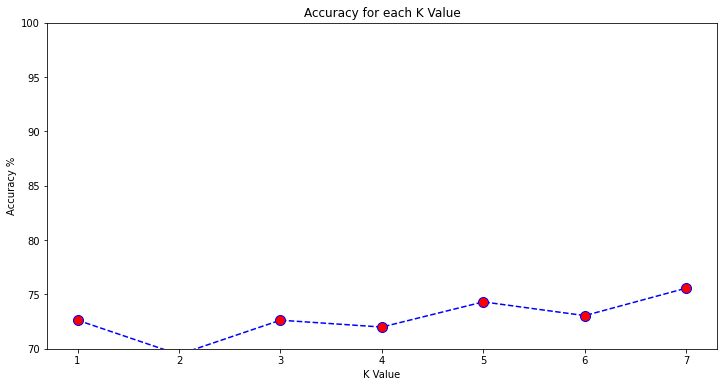

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
D_train_reductuted,D_test_reductuted = reduce_dimentions(D_train,D_test,e_vecs)

accuracy = []
labels_pred_LDA=[]
MaxAccuracy=0
for i in range(1, 8):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(D_train_reductuted, np.ravel(Y_train))

    test_predict = classifier.predict(D_test_reductuted)
  
    print("Accuracy with = ",metrics.accuracy_score(Y_test,test_predict))
    print("--------------------------------------------------------\n")
    
    true_predicted=0
    current_accuracy=metrics.accuracy_score(Y_test,test_predict)
    print(current_accuracy)
    accuracy.append(current_accuracy*100)
    if current_accuracy>MaxAccuracy:
        labels_pred_LDA=test_predict
        MaxAccuracy=current_accuracy

accuracy_graph(accuracy)

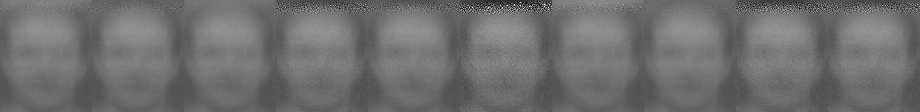

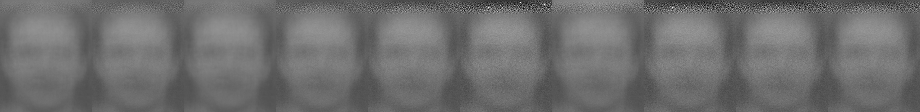

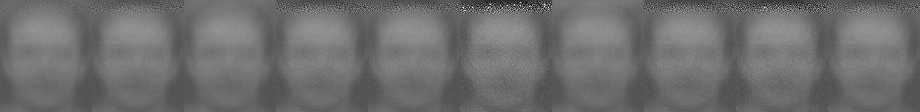

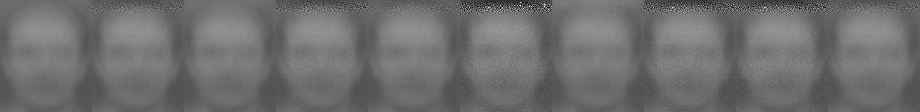

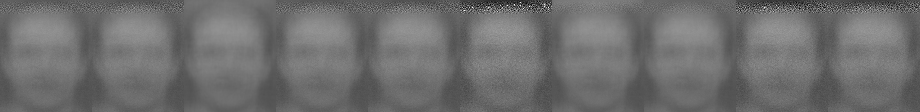

In [ ]:
mean_vector = np.mean(D_train,axis = 0).reshape((-1,1)).T
Z = D_train-mean_vector
p = e_vecs[:,0:1]
A = np.dot(Z,p)
Z_new = np.dot(A,p.T)
Z_new=Z_new+mean_vector
##show_image(Z_new[0])
for i in range(5):
  img = PIL.Image.fromarray(np.concatenate((
      Z_new[i].reshape(-1,92),Z_new[i+10].reshape(-1,92),Z_new[i+20].reshape(-1,92),Z_new[i+30].reshape(-1,92),
      Z_new[i+40].reshape(-1,92),Z_new[i+50].reshape(-1,92),Z_new[i+60].reshape(-1,92),Z_new[i+70].reshape(-1,92),
      Z_new[i+80].reshape(-1,92),Z_new[i+90].reshape(-1,92)
      ),axis = 1).reshape(112,-1).astype('uint8'))
  display(img.convert("L"))

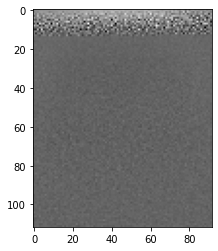

In [ ]:
# Show the eigenfaces
# Show the first eigenfaces
eigen_vecMomen = np.reshape(e_vecs[:,0], (112,92))
plt.imshow(eigen_vecMomen, cmap="gray")
plt.show()

### Show failure and success cases.


In [ ]:
from random import seed
from random import randint
def showFailSuccess(label_predict,true_label,D_test):
  trueFaces=list()
  trueNonFaces=list()
  falseFaces=list()
  falseNonFaces=list()
  for i in range(len(label_predict)):
    if(label_predict[i]==true_label[i]):
      if(label_predict[i]==1):
        trueFaces.append(D_test[i])
      if(label_predict[i]==0):
        trueNonFaces.append(D_test[i])
    else:
      if(label_predict[i]==1):
        falseFaces.append(D_test[i])
      if(label_predict[i]==0):
        falseNonFaces.append(D_test[i])

  print("True face")
  if(len(trueFaces)==0):
    print("There's no faces"+str(len(trueFaces)))
  else:
      img = PIL.Image.fromarray(np.concatenate((
              trueFaces[randint(0, len(trueFaces)-1)].reshape(-1,92),
              trueFaces[randint(0, len(trueFaces)-1)].reshape(-1,92),
              trueFaces[randint(0, len(trueFaces)-1)].reshape(-1,92)
              ),axis=1).reshape(112,-1).astype('uint8'))
      display(img)

  print("True Nonface")
  if(len(trueNonFaces)==0):
    print("There's no thing")
  else:
    img = PIL.Image.fromarray(np.concatenate((
            trueNonFaces[randint(0, len(trueNonFaces)-1)].reshape(-1,92),
            trueNonFaces[randint(0, len(trueNonFaces)-1)].reshape(-1,92),
            trueNonFaces[randint(0, len(trueNonFaces)-1)].reshape(-1,92)
            ),axis=1).reshape(112,-1).astype('uint8'))
    display(img)

  print("False face")
  if(len(falseFaces)==0):
    print("There's no thing")
  else:
      img = PIL.Image.fromarray(np.concatenate((
              falseFaces[randint(0, len(falseFaces)-1)].reshape(-1,92)
              ,falseFaces[randint(0, len(falseFaces)-1)].reshape(-1,92)
              ,falseFaces[randint(0, len(falseFaces)-1)].reshape(-1,92)
              ),axis=1).reshape(112,-1).astype('uint8'))
      display(img)
  print("False Nonface")


  if(len(falseNonFaces)==0):
    print("There's no thing")
  else:
    img = PIL.Image.fromarray(np.concatenate((
            falseNonFaces[randint(0, len(falseNonFaces)-1)].reshape(-1,92)
            ,falseNonFaces[randint(0, len(falseNonFaces)-1)].reshape(-1,92),
            falseNonFaces[randint(0, len(falseNonFaces)-1)].reshape(-1,92)
            ),axis=1).reshape(112,-1).astype('uint8'))
    display(img)

### PCA

True face


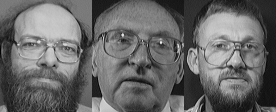

True Nonface


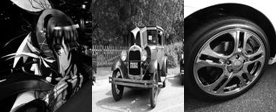

False face


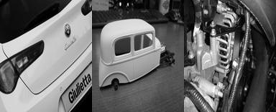

False Nonface
There's no thing


In [ ]:
showFailSuccess(labels_pred_PCA,Y_test,D_test)

### LDA

True face


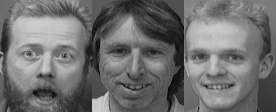

True Nonface


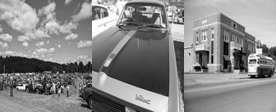

False face


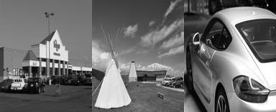

False Nonface


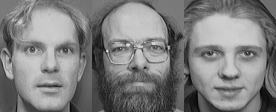

In [ ]:
showFailSuccess(labels_pred_LDA,Y_test,D_test)